## Building Search engine using  Jina CLIP v2: Multilingual Multimodal Embeddings for Text and Images  & lancedb


Jina-CLIP v2, a 0.9B multimodal embedding model with multilingual support of 89 languages, high image resolution at 512x512, and Matryoshka representations.
#### In this tutorial we are using jina2 using huggigface libraries





## Install libraries

In [1]:
!pip install lancedb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 10.5 MB/s eta 0:00:00




### In this tutorial we are using jina2 using huggigface libraries

The Jina CLIP v2 model can be loaded in various ways. In this instance, we're utilizing the SentenceTransformer-based approach. While this method may be slower due to CPU usage, faster embedding generation can be achieved by leveraging the CLIP 2 API. https://lancedb.github.io/lancedb/embeddings/available_embedding_models/multimodal_embedding_functions/jina_multimodal_embedding/

#### Below is sample example of using jina-clip-v2
we can do text based, Image based & nultilingual search

In [2]:
#Import the pacages
import os
from io import BytesIO
from pathlib import Path

import lancedb
import pandas as pd
import requests
from PIL import Image
from IPython.display import display, Image as IPImage
from lancedb.pydantic import LanceModel, Vector
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt

In [3]:

# Connect to LanceDB
db = lancedb.connect("~/.lancedb")

# Load the SentenceTransformer model
model = SentenceTransformer('jinaai/jina-clip-v2', trust_remote_code=True,truncate_dim = 512
)

# Define the schema
class Images(LanceModel):
    label: str
    image_uri: str  # Image URI as the source
    vector: Vector(512)  # Vector column for embeddings

# Create or connect to the table
table = db.create_table("images", schema=Images, mode="overwrite")

# As we said model is multlingual so
labels = ["cat", "बिल्ली", "dog", "狗", "horse", "horse"]
uris = [
    "http://farm1.staticflickr.com/53/167798175_7c7845bbbd_z.jpg",
    "http://farm1.staticflickr.com/134/332220238_da527d8140_z.jpg",
    "http://farm9.staticflickr.com/8387/8602747737_2e5c2a45d4_z.jpg",
    "http://farm5.staticflickr.com/4092/5017326486_1f46057f5f_z.jpg",
    "http://farm9.staticflickr.com/8216/8434969557_d37882c42d_z.jpg",
    "http://farm6.staticflickr.com/5142/5835678453_4f3a4edb45_z.jpg",
]

# Download images and encode them
image_bytes = [requests.get(uri).content for uri in uris]
image_embeddings = model.encode(uris, normalize_embeddings=True)

# Create a DataFrame
data = pd.DataFrame({
    "label": labels,
    "image_uri": uris,
    "vector": list(image_embeddings)
})
# Add the data to the table
table.add(data)

# Query example via text
text_query = "cat "
text_query_embedding = model.encode(text_query, normalize_embeddings=True)

# Find nearest neighbors using text
text_results = table.search(text_query_embedding).limit(3).to_pandas()
print("Results from text query:")
print(text_results)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/17.5k [00:00<?, ?B/s]

custom_st.py:   0%|          | 0.00/12.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-v2:
- custom_st.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


config.json:   0%|          | 0.00/2.03k [00:00<?, ?B/s]

configuration_clip.py:   0%|          | 0.00/12.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- configuration_clip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_clip.py:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

eva_model.py:   0%|          | 0.00/26.4k [00:00<?, ?B/s]

rope_embeddings.py:   0%|          | 0.00/5.71k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- rope_embeddings.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- eva_model.py
- rope_embeddings.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


hf_model.py:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- hf_model.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


transform.py:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- transform.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- modeling_clip.py
- eva_model.py
- hf_model.py
- transform.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

/root/.cache/huggingface/modules/transformers_modules/jinaai/jina-clip-implementation/3742048faee267e47f6cd862e45fd7c240cbd205/modeling_clip.py:137: UserWarning: Flash attention requires CUDA, disabling
  warnings.warn('Flash attention requires CUDA, disabling')
/root/.cache/huggingface/modules/transformers_modules/jinaai/jina-clip-implementation/3742048faee267e47f6cd862e45fd7c240cbd205/modeling_clip.py:172: UserWarning: xFormers requires CUDA, disabling
  warnings.warn('xFormers requires CUDA, disabling')


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

configuration_xlm_roberta.py:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- configuration_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_lora.py:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

modeling_xlm_roberta.py:   0%|          | 0.00/49.9k [00:00<?, ?B/s]

xlm_padding.py:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- xlm_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


embedding.py:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mlp.py:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


block.py:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

stochastic_depth.py:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mha.py:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

rotary.py:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mha.py
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- block.py
- stochastic_depth.py
- mha.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-impleme

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

processing_clip.py:   0%|          | 0.00/2.67k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- processing_clip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Results from text query:
    label                                          image_uri  \
0     cat  http://farm1.staticflickr.com/53/167798175_7c7...   
1  बिल्ली  http://farm1.staticflickr.com/134/332220238_da...   
2       狗  http://farm5.staticflickr.com/4092/5017326486_...   

                                              vector  _distance  
0  [-0.014676968, 0.08036212, 0.005830338, 0.0749...   1.366044  
1  [-0.014399904, 0.10926569, -0.0125547685, 0.08...   1.403262  
2  [0.028017132, 0.122899786, -0.010693597, 0.034...   1.538371  


### Query example via Image

#### we are doing image based search now for the above example


In [4]:

# Fetch the image from a file or URL
def fetch_image(image_source):
    """
    Fetch an image from a file path or a URL.
    """
    if os.path.exists(image_source):
        return Image.open(image_source)
    else:
        response = requests.get(image_source)
        return Image.open(BytesIO(response.content))

# image of horse
query_image_url = "http://farm6.staticflickr.com/5142/5835678453_4f3a4edb45_z.jpg"  # Local file path to test image
query_image = fetch_image(query_image_url)

# Encode the query image
query_image_embedding = model.encode([query_image], normalize_embeddings=True)

# Debugging: Check the shape and type of the query_image_embedding
print(f"Raw query_image_embedding shape: {query_image_embedding.shape}")
print(f"Raw query_image_embedding type: {type(query_image_embedding)}")

# Extract the first embedding if it's batched
if len(query_image_embedding.shape) > 1:
    query_image_embedding = query_image_embedding[0]

# Convert to a list if necessary
if not isinstance(query_image_embedding, list):
    query_image_embedding = query_image_embedding.tolist()

# Debugging: Check the final shape and type
print(f"Final query_image_embedding shape: {len(query_image_embedding)}")
print(f"Final query_image_embedding type: {type(query_image_embedding)}")

# Perform the search
image_results = table.search(query_image_embedding).limit(3).to_pandas()
print("Image Query Results:")
print(image_results)

Raw query_image_embedding shape: (1, 512)
Raw query_image_embedding type: <class 'numpy.ndarray'>
Final query_image_embedding shape: 512
Final query_image_embedding type: <class 'list'>
Image Query Results:
    label                                          image_uri  \
0   horse  http://farm6.staticflickr.com/5142/5835678453_...   
1   horse  http://farm9.staticflickr.com/8216/8434969557_...   
2  बिल्ली  http://farm1.staticflickr.com/134/332220238_da...   

                                              vector     _distance  
0  [-0.0058654496, 0.102436356, 0.07907705, 0.106...  7.908797e-14  
1  [0.02997741, 0.049638063, 0.006789788, 0.11391...  4.896866e-01  
2  [-0.014399904, 0.10926569, -0.0125547685, 0.08...  7.422640e-01  


This is how you can get results based on text & images & multilingual query

## Lets build Food recommandation based on jina v2 multimodal embedding & lancdb

### Download  full food-101 dataset  from here  [Kaggle](https://www.kaggle.com/datasets/kmader/food41/data)

#### For this notebook demo  I used only [2 classes data ](https://drive.google.com/drive/folders/1j9kh0npIWSnt6JJv8XfXxyP137WBKE4i?usp=sharing)

#### Organizing Data into Folders and Preparing Labels and Paths for Embedding Steps

Folder Structure:
- `new_food_2`
  - `Rice`
  - `Vegetable-Fruit Dataset`


In [5]:
#### Mount the drive & load path of images
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Creating a CSV File to Store Image Paths and Their Corresponding Labels

In [6]:
import os
import pandas as pd

# Define the path to the base directory containing your folders
base_path = "/content/drive/MyDrive/small_food/new_food_2"

# List all subdirectories
categories = [folder for folder in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, folder))]

# Initialize a list to hold image paths and their corresponding labels
data = []

# Loop through each category folder and collect image paths
for category in categories:
    category_path = os.path.join(base_path, category)
    for root, _, files in os.walk(category_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Add other image formats if needed
                image_path = os.path.join(root, file)
                data.append({"image_uri": image_path, "label": category})

# Convert to a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
csv_path = "/content/drive/MyDrive/small_food/image_labels.csv"
df.to_csv(csv_path, index=False)

print(f"CSV file created at {csv_path} with {len(df)} entries.")


CSV file created at /content/drive/MyDrive/small_food/image_labels.csv with 98 entries.


In [7]:
## Load the csv file
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/small_food/image_labels.csv")
df.head()

image_uri            label
0  /content/drive/MyDrive/small_food/new_food_2/V...  Vegetable-Fruit
1  /content/drive/MyDrive/small_food/new_food_2/V...  Vegetable-Fruit
2  /content/drive/MyDrive/small_food/new_food_2/V...  Vegetable-Fruit
3  /content/drive/MyDrive/small_food/new_food_2/V...  Vegetable-Fruit
4  /content/drive/MyDrive/small_food/new_food_2/V...  Vegetable-Fruit

### Now based on image & labels we are doing embedding & saving it in lancdb

In [8]:
import os
import lancedb
from lancedb.pydantic import LanceModel, Vector
from sentence_transformers import SentenceTransformer
import pandas as pd
from PIL import Image
from io import BytesIO
import numpy as np

# Connect to LanceDB
db = lancedb.connect("~/.lancedbnew")
truncate_dim = 512

# Load the SentenceTransformer model
model = SentenceTransformer('jinaai/jina-clip-v2', trust_remote_code=True,truncate_dim = truncate_dim)

# Define the schema
class Images(LanceModel):
    label: str
    image_uri: str  # Image URI as the source
    vector: Vector(truncate_dim)  # Vector column for embeddings

# Create or connect to the table
table = db.create_table("images", schema=Images, mode="overwrite")

# Load the CSV file
csv_path = "/content/drive/MyDrive/small_food/image_labels.csv"
df = pd.read_csv(csv_path)

# Initialize lists to store processed data
labels = df['label'].tolist()
image_uris = df['image_uri'].tolist()
embeddings = []

# Process each image in the CSV
for idx, image_path in enumerate(image_uris):
    try:
        print(f"Processing {idx + 1}/{len(image_uris)}: {image_path}")  # Print the current file being processed
        # Open image and convert to embeddings
        with open(image_path, 'rb') as img_file:
            image = Image.open(img_file).convert("RGB")
            image_embedding = model.encode([image], normalize_embeddings=True)
            embeddings.append(image_embedding[0])  # Append the vector
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        continue


# Convert embeddings to numpy arrays
embeddings = np.array(embeddings)
# Create a DataFrame for LanceDB
data = pd.DataFrame({
    "label": labels,
    "image_uri": image_uris,
    "vector": list(embeddings)
})
# Add the data to the LanceDB table
table.add(data)




/root/.cache/huggingface/modules/transformers_modules/jinaai/jina-clip-implementation/3742048faee267e47f6cd862e45fd7c240cbd205/modeling_clip.py:137: UserWarning: Flash attention requires CUDA, disabling
  warnings.warn('Flash attention requires CUDA, disabling')
/root/.cache/huggingface/modules/transformers_modules/jinaai/jina-clip-implementation/3742048faee267e47f6cd862e45fd7c240cbd205/modeling_clip.py:172: UserWarning: xFormers requires CUDA, disabling
  warnings.warn('xFormers requires CUDA, disabling')


Processing 1/98: /content/drive/MyDrive/small_food/new_food_2/Vegetable-Fruit/10.jpg
Processing 2/98: /content/drive/MyDrive/small_food/new_food_2/Vegetable-Fruit/11.jpg
Processing 3/98: /content/drive/MyDrive/small_food/new_food_2/Vegetable-Fruit/0.jpg
Processing 4/98: /content/drive/MyDrive/small_food/new_food_2/Vegetable-Fruit/1.jpg
Processing 5/98: /content/drive/MyDrive/small_food/new_food_2/Vegetable-Fruit/13.jpg
Processing 6/98: /content/drive/MyDrive/small_food/new_food_2/Vegetable-Fruit/15.jpg
Processing 7/98: /content/drive/MyDrive/small_food/new_food_2/Vegetable-Fruit/17.jpg
Processing 8/98: /content/drive/MyDrive/small_food/new_food_2/Vegetable-Fruit/12.jpg
Processing 9/98: /content/drive/MyDrive/small_food/new_food_2/Vegetable-Fruit/16.jpg
Processing 10/98: /content/drive/MyDrive/small_food/new_food_2/Vegetable-Fruit/14.jpg
Processing 11/98: /content/drive/MyDrive/small_food/new_food_2/Vegetable-Fruit/20.jpg
Processing 12/98: /content/drive/MyDrive/small_food/new_food_2/Ve

#### Text based query search



In [9]:

# Query example via text
text_query = " vegitables soup "
text_query_embedding = model.encode(text_query, normalize_embeddings=True)

# Find nearest neighbors using text
text_results = table.search(text_query_embedding).limit(3).to_pandas()
print("Results from text query:")
print(text_results)

Results from text query:
             label                                          image_uri  \
0  Vegetable-Fruit  /content/drive/MyDrive/small_food/new_food_2/V...   
1  Vegetable-Fruit  /content/drive/MyDrive/small_food/new_food_2/V...   
2  Vegetable-Fruit  /content/drive/MyDrive/small_food/new_food_2/V...   

                                              vector  _distance  
0  [0.053401865, 0.06045878, 0.027279321, 0.09057...   1.451658  
1  [0.020733627, 0.069162644, 0.029952297, 0.0533...   1.501224  
2  [0.014536029, 0.073719315, 0.0315481, 0.080828...   1.516304  


In [10]:

# Query example via text
text_query = " rice biryani "
text_query_embedding = model.encode(text_query, normalize_embeddings=True)

# Find nearest neighbors using text
text_results = table.search(text_query_embedding).limit(5).to_pandas()
print("Results from text query:")
print(text_results)

Results from text query:
  label                                          image_uri  \
0  Rice  /content/drive/MyDrive/small_food/new_food_2/R...   
1  Rice  /content/drive/MyDrive/small_food/new_food_2/R...   
2  Rice  /content/drive/MyDrive/small_food/new_food_2/R...   
3  Rice  /content/drive/MyDrive/small_food/new_food_2/R...   
4  Rice  /content/drive/MyDrive/small_food/new_food_2/R...   

                                              vector  _distance  
0  [-0.03897679, 0.17268911, 0.026397461, 0.05065...   1.246697  
1  [0.01770382, 0.17614241, 0.021768652, 0.094345...   1.352594  
2  [0.013835855, 0.110533215, 0.060185626, 0.1150...   1.354973  
3  [0.018703124, 0.12488442, 0.03489212, 0.107657...   1.357902  
4  [0.038268246, 0.16299663, 0.004079318, 0.07822...   1.357914  


### Image based search


Query Image:


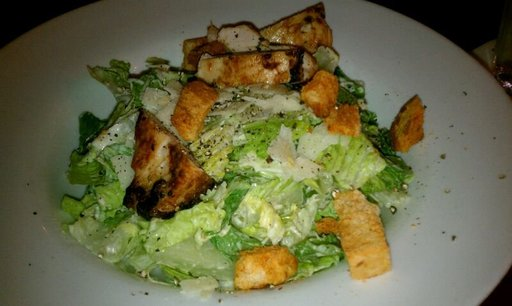

Raw query_image_embedding shape: (1, 512)
Raw query_image_embedding type: <class 'numpy.ndarray'>
Image Query Results:
             label                                          image_uri  \
0  Vegetable-Fruit  /content/drive/MyDrive/small_food/new_food_2/V...   
1  Vegetable-Fruit  /content/drive/MyDrive/small_food/new_food_2/V...   
2  Vegetable-Fruit  /content/drive/MyDrive/small_food/new_food_2/V...   
3  Vegetable-Fruit  /content/drive/MyDrive/small_food/new_food_2/V...   
4  Vegetable-Fruit  /content/drive/MyDrive/small_food/new_food_2/V...   

                                              vector  _distance  
0  [0.03398791, 0.095794275, -0.018574353, 0.0337...   0.000000  
1  [0.032099266, 0.040508382, 0.014722838, 0.0354...   0.112821  
2  [0.02648662, 0.04464159, 0.002022647, 0.073952...   0.128473  
3  [0.040251896, 0.060741726, 0.039796557, 0.0159...   0.138648  
4  [0.04798884, 0.10667701, 0.039873254, 0.057920...   0.147284  

Retrieved Images:
Label: Vegetable-Fruit, Dis

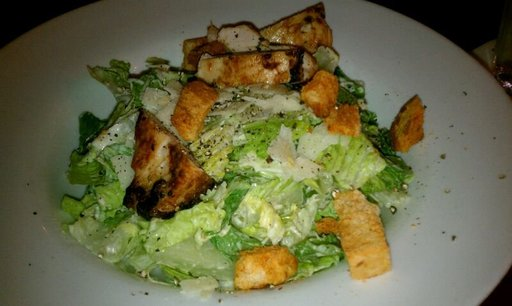

Label: Vegetable-Fruit, Distance: 0.11282147467136383


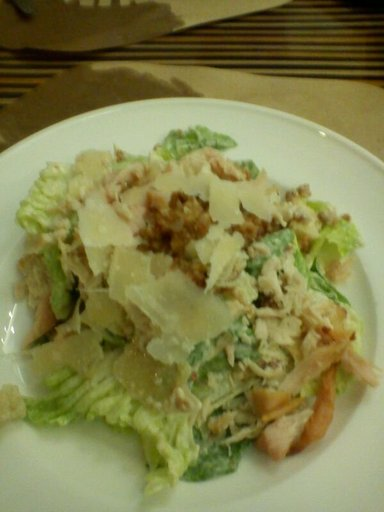

Label: Vegetable-Fruit, Distance: 0.1284734308719635


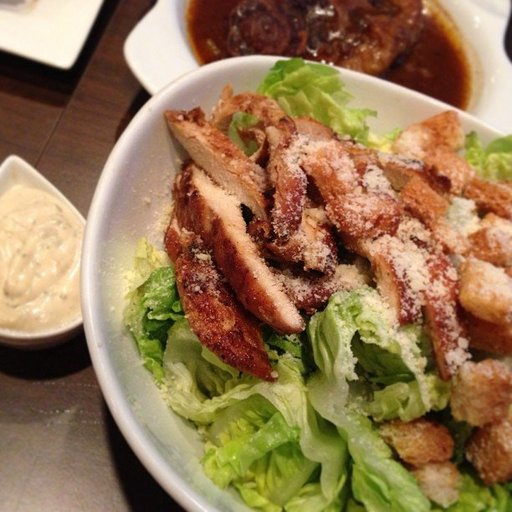

Label: Vegetable-Fruit, Distance: 0.13864830136299133


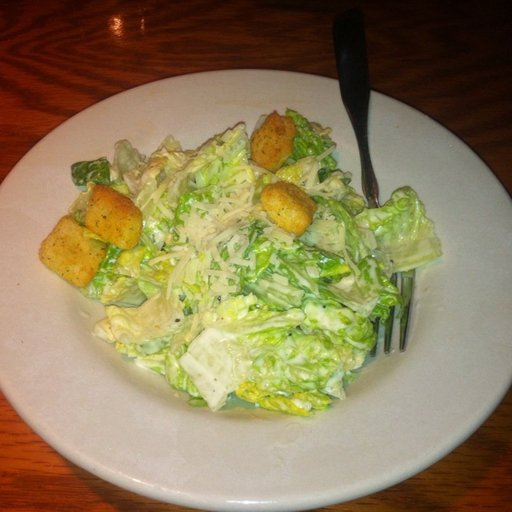

Label: Vegetable-Fruit, Distance: 0.14728376269340515


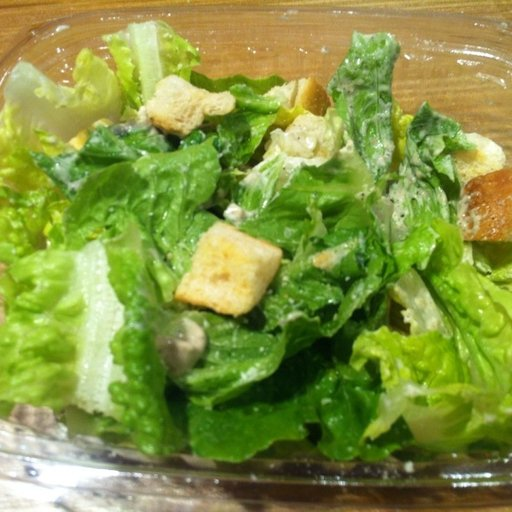

In [13]:
from IPython.display import display, Image as IPImage
import matplotlib.pyplot as plt

# Fetch the image from a file or URL
def fetch_image(image_source):
    """
    Fetch an image from a file path or a URL.
    """
    if os.path.exists(image_source):
        return Image.open(image_source)
    else:
        response = requests.get(image_source)
        return Image.open(BytesIO(response.content))

# Query with a local image
query_image_url = "/content/drive/MyDrive/small_food/new_food_2/Vegetable-Fruit/12.jpg"  # Local file path to test image
query_image = fetch_image(query_image_url)

# Display the query image
print("Query Image:")
display(query_image)

# Encode the query image
query_image_embedding = model.encode([query_image], normalize_embeddings=True)

# Debugging: Check the shape and type of the query_image_embedding
print(f"Raw query_image_embedding shape: {query_image_embedding.shape}")
print(f"Raw query_image_embedding type: {type(query_image_embedding)}")

# Extract the first embedding if it's batched
if len(query_image_embedding.shape) > 1:
    query_image_embedding = query_image_embedding[0]

# Convert to a list if necessary
if not isinstance(query_image_embedding, list):
    query_image_embedding = query_image_embedding.tolist()

# Perform the search
image_results = table.search(query_image_embedding).limit(5).to_pandas()
print("Image Query Results:")
print(image_results)

# Display the retrieved images
print("\nRetrieved Images:")
for index, row in image_results.iterrows():
    print(f"Label: {row['label']}, Distance: {row['_distance']}")
    img = fetch_image(row['image_uri'])  # Fetch the image from the URI
    display(img)  # Display the image


Query Image:


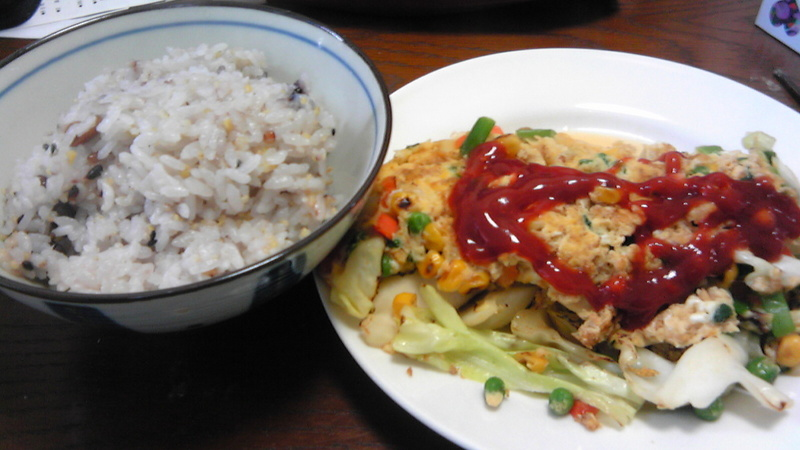

Raw query_image_embedding shape: (1, 512)
Raw query_image_embedding type: <class 'numpy.ndarray'>
Image Query Results:
  label                                          image_uri  \
0  Rice  /content/drive/MyDrive/small_food/new_food_2/R...   
1  Rice  /content/drive/MyDrive/small_food/new_food_2/R...   
2  Rice  /content/drive/MyDrive/small_food/new_food_2/R...   
3  Rice  /content/drive/MyDrive/small_food/new_food_2/R...   
4  Rice  /content/drive/MyDrive/small_food/new_food_2/R...   

                                              vector  _distance  
0  [0.10215698, 0.03488325, 0.07692675, 0.1340418...   0.000000  
1  [0.07078372, 0.1694398, 0.055898074, 0.1191742...   0.303376  
2  [0.056605097, 0.12720048, 0.031542275, 0.13055...   0.322529  
3  [0.019074202, 0.07827992, 0.06916776, 0.127158...   0.347323  
4  [0.022701448, 0.16595668, 0.038484853, 0.07074...   0.357251  

Retrieved Images:
Label: Rice, Distance: 0.0


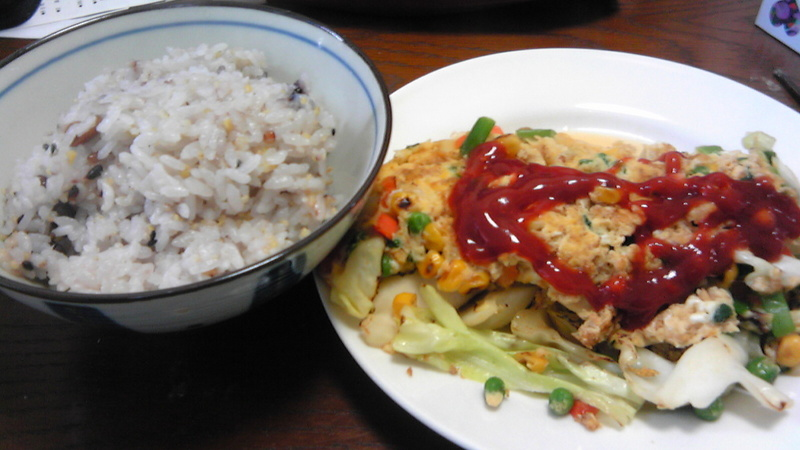

Label: Rice, Distance: 0.30337584018707275


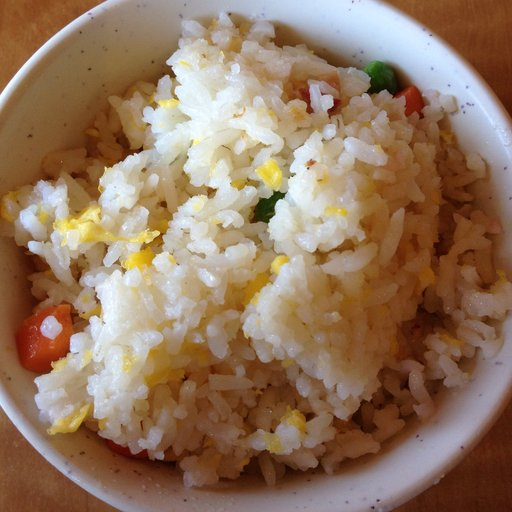

Label: Rice, Distance: 0.32252901792526245


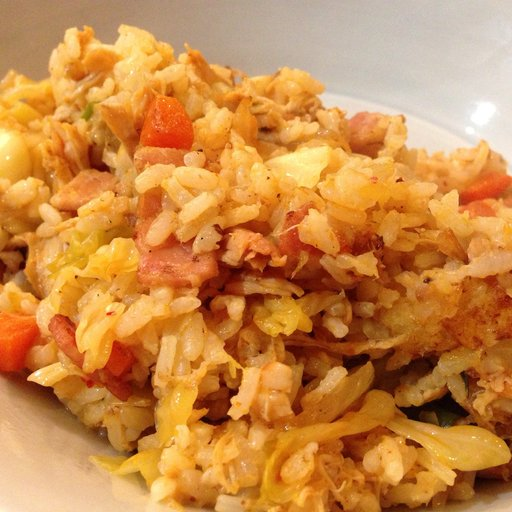

Label: Rice, Distance: 0.3473229706287384


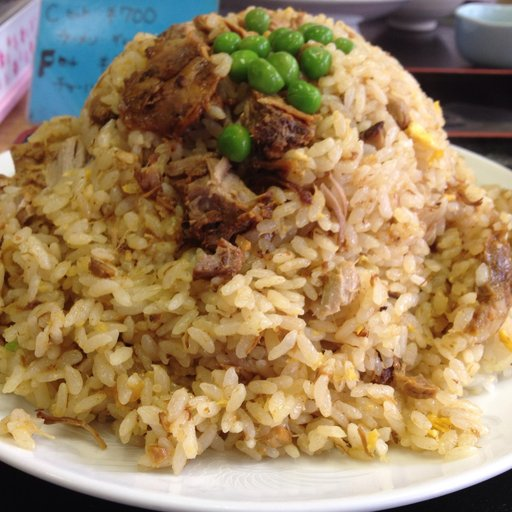

Label: Rice, Distance: 0.3572513163089752


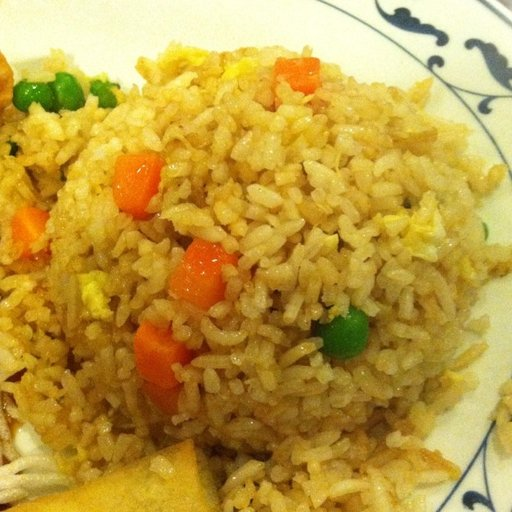

In [12]:

# Query with a local image
query_image_url = "/content/drive/MyDrive/small_food/new_food_2/Rice/0.jpg"  # Local file path to test image
query_image = fetch_image(query_image_url)

# Display the query image
print("Query Image:")
display(query_image)

# Encode the query image
query_image_embedding = model.encode([query_image], normalize_embeddings=True)

# Debugging: Check the shape and type of the query_image_embedding
print(f"Raw query_image_embedding shape: {query_image_embedding.shape}")
print(f"Raw query_image_embedding type: {type(query_image_embedding)}")

# Extract the first embedding if it's batched
if len(query_image_embedding.shape) > 1:
    query_image_embedding = query_image_embedding[0]

# Convert to a list if necessary
if not isinstance(query_image_embedding, list):
    query_image_embedding = query_image_embedding.tolist()

# Perform the search
image_results = table.search(query_image_embedding).limit(5).to_pandas()
print("Image Query Results:")
print(image_results)

# Display the retrieved images
print("\nRetrieved Images:")
for index, row in image_results.iterrows():
    print(f"Label: {row['label']}, Distance: {row['_distance']}")
    img = fetch_image(row['image_uri'])  # Fetch the image from the URI
    display(img)  # Display the image


## Please check our other coverd topics related to [multimodal-embeeding](https://lancedb.github.io/lancedb/examples/python_examples/multimodal/)